<a href="https://colab.research.google.com/github/HexQuant/math-stat-ex/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from numpy import array
from sympy import symbols, binomial, Sum, factorial, oo
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # appropriate import to draw 3d polygons
from matplotlib import style

# Глава 2

## Задача 2

In [8]:
N = 20
Ks = []
for n in range(1,N):
  k = 2
  eta1 = random.random()
  eta2 = random.random()
  while eta1 > eta2:
    eta1 = eta2
    eta2 = random.random()
    k += 1
  Ks.append(k)

MK = array(Ks).mean()
MK

2.473684210526316

In [9]:
n, i = symbols('n i', positive = True,  Integer=True)
# Количество перестановок n чисел
nn = factorial(n)
# Вероятность выпадения нужной перестановки (нужная перестановка единственна)
pn = 1/nn
Sum(pn, (n, 0, oo)).doit()

E

## Задача 3

In [10]:
N = 20
Ls = []
for n in range(1,N):
  l = 1
  eta = random.random()
  while eta<=1: 
    eta +=random.random() 
    l+=1
  Ls.append(l)

ML = array(Ls).mean()
ML

2.6842105263157894

Формулы свёртки:

$F_{X+Y}(z)=P(X+Y \leq z)=\int_{-\infty}^{\infty}\int_{-\infty}^{z-y}f_X dx f_Y dy=\int_{-\infty}^\infty F_X(z-y)f_Y dy$

$f_{X+Y}(z)=\frac{d}{dz}\int_{-\infty}^\infty F_X(x-y)f_Ydy=\int_{-\infty}^\infty f_X (z-y)f_Ydy $

$P(L=n) = P(L>n-1)-P(L>n)$

Пусть есть выборка удовлетворяющая двум условиям:

$\eta_1+\eta_2+...+\eta_n>1$

$\eta_1+\eta_2+...+\eta_{n-1} \leq 1$

$P(L=2)=P(\eta_1+\eta_2>1)=1-P(\eta_1+\eta_2 \leq 1)=1-\int_0^1 \int_0^{1-y}f_X(x)dx f_Y(y)dy$

$P(L=3)=P(L \leq 3)-P(L < 3)= P(L \leq 3)-P(L = 2)$

$P(L \leq 3) = P(\eta_1+\eta_2+\eta_3>1)=1-P(\eta_1+\eta_2+\eta_3 \leq 1)=
1-\int_0^1 \int_0^{1-z} \int_0^{1-z-y}f_X(x)dx f_Y(y)dy f_Z(z)dz$

$P(L=n)=P(L \leq n)-P(L\leq n-1)$

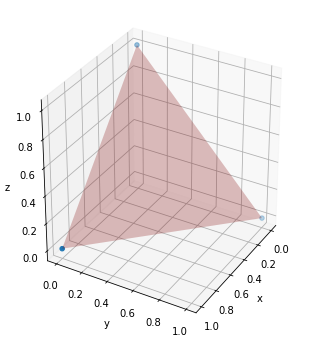

In [11]:
plt.figure('SPLTV',figsize=(12,6))
ax=plt.subplot(121,projection='3d')
x1=array([1, 0, 0])
y1=array([0, 1, 0])
z1=array([0, 0, 1])
ax.scatter(x1,y1,z1)

# 1. create vertices from points
verts = [list(zip(x1, y1, z1))]
# 2. create 3d polygons and specify parameters
srf = Poly3DCollection(verts, alpha=.25, facecolor='#800000')
# 3. add polygon to the figure (current axes)
plt.gca().add_collection3d(srf)

ax.view_init(30, 30)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Объем n-мерного симплекса равен:

$V_n=\frac{1}{n!}$

Тогда из общей формулы получим:

$P(L=n)=P(L \leq n)-P(L\leq n-1) = (1-\frac{1}{n!}) - (1-\frac{1}{(n-1)!})= \frac{n-1}{n!}$

$ML = \sum_{n=2}^\infty n \cdot P(L=n)=\sum_{n=2}^\infty n \cdot\frac{n-1}{n!}=e$

In [12]:
n = symbols('n', positive=True, Integer=True)
Sum(n*(n-1)/factorial(n),[n,2,oo]).doit()

E

## Задача 4

$M(N|X_0=x_0)=\sum_{n=0}^\infty P(N>n|X_0=x_0)$
